In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("data_cleaned.csv", index_col=0)

In [13]:
df.head()

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,7.0,1.0,0.0
2,mit-han-lab/llm-awq,No Topic,354.0,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0.0,24.0,3.0,0.0,0.0
3,KasperskyLab/triangle_check,No Topic,299.0,['Python'],0.0,18.0,4.0,0.0,1.0
4,damo-vilab/videocomposer,No Topic,229.0,"['Python', 'Shell']",0.0,6.0,2.0,0.0,0.0


# Data Mining

In [77]:
# Quelle(s) relation(s) entre les colonnes ?
# Quelle(s) distribution(s) des variables ?
# Quels sont les langages les plus utilisés ?
# Quels sont les projets tendances ?
# Quels sont les sujets tendances ?
# Quels sont les langages tendances ?
# Quels sont les sujets les traités ?
# Quels sont les sujets intéressants ?
# Les projets tendance sont-ils des projets intéressants ?

In [24]:
correlation_matrix_pearson = df[["Etoiles", "Forks", "NumberOfContributors", "Comments", "Tags"]].corr(method='pearson')
correlation_matrix_pearson

,Etoiles,Forks,NumberOfContributors,Comments,Tags
Etoiles,1.000000,0.673447,0.012466,0.002393,0.001211
Forks,0.673447,1.000000,0.033620,0.011364,0.009073
NumberOfContributors,0.012466,0.033620,1.000000,0.023391,0.260007
Comments,0.002393,0.011364,0.023391,1.000000,0.074658
Tags,0.001211,0.009073,0.260007,0.074658,1.000000


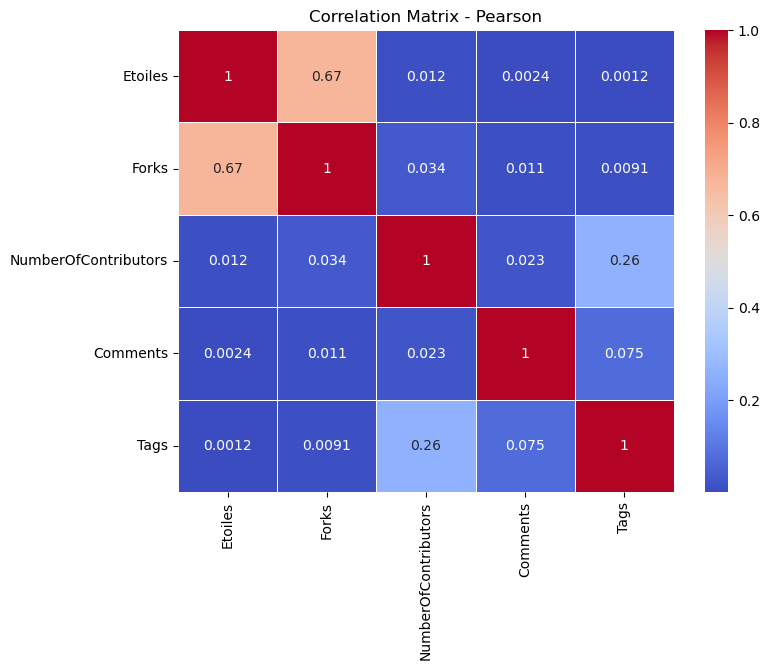

In [23]:
# Représentation graphique de la matrice
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Pearson')
plt.show()

La corrélation de Pearson est une mesure de la corrélation linéaire entre deux variables continues. Elle calcule le coefficient de corrélation de Pearson, qui varie de -1 à 1. Une corrélation de 1 indique une corrélation linéaire positive parfaite, une corrélation de -1 indique une corrélation linéaire négative parfaite, et une corrélation de 0 indique une absence de corrélation linéaire. La corrélation de Pearson suppose que les variables sont distribuées normalement.

Les résultats présentés montrent soit une faible correlation entre "Etoiles" <===>"Forks", soit une très faible correlation, voire pas de relation. Il n'existe donc pas de relation lineaire entre les différents champs de notre dataset.  

Vérifions donc la distribution des variables 

# La distribution des variables 

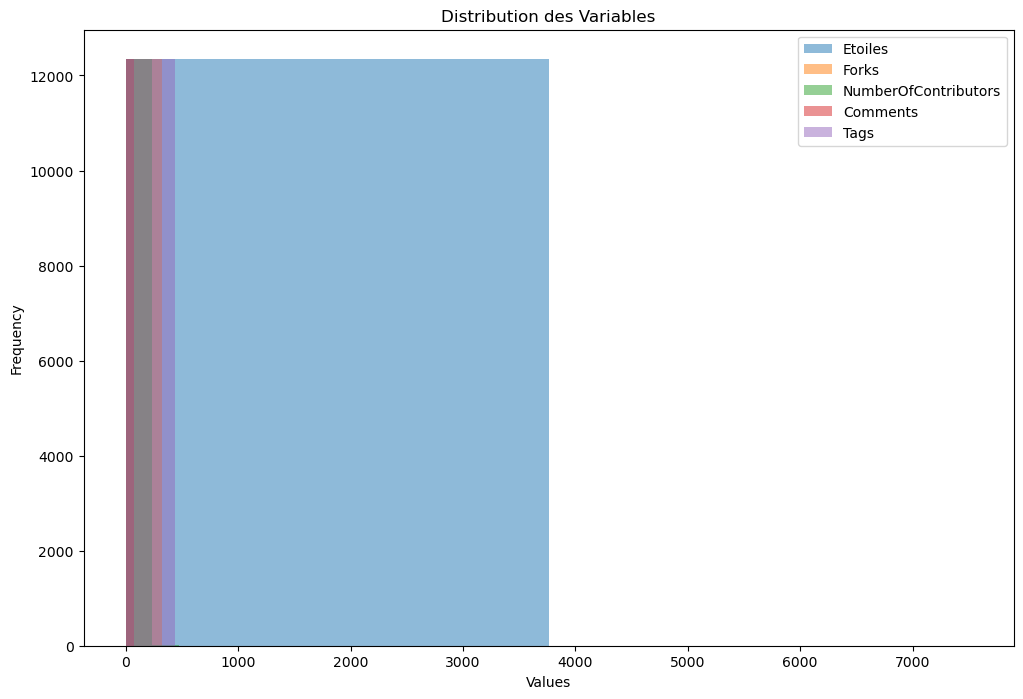

In [46]:
import matplotlib.pyplot as plt
data = df[["Etoiles", "Forks", "NumberOfContributors", "Comments", "Tags"]]
# Plot distribution of each variable
plt.figure(figsize=(12, 8))

# Iterate over each column in the DataFrame
for column in data.columns:
    plt.hist(data[column], bins=2, alpha=0.5, label=column)

plt.legend(loc='upper right')
plt.title('Distribution des Variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Distribution inconnue

# Langages et technologies les plus utilisés

In [54]:
langages = []
for i in range(df.shape[0]):
    if df["Langages"][i] != "No Langage":
        langages.extend(eval(df["Langages"][i]))
    else:
        langages.append("No Langage")

TypeError: eval() arg 1 must be a string, bytes or code object

In [55]:
from collections import Counter

occurrences = Counter(langages)

for element, count in occurrences.items():
    print(f"{element}: {count}")

Python: 62
JavaScript: 42
Cuda: 3
Shell: 24
C++: 11
C: 10
Jupyter Notebook: 9
No Langage: 31
TypeScript: 16
Rust: 3
Lua: 1
Tcl: 1
Ruby: 4
HTML: 28
CSS: 23
Java: 3
Dockerfile: 10
CMake: 2
Go: 7
Vue: 5
SCSS: 4
Makefile: 12
PHP: 4
Agda: 1
Dart: 2
Swift: 4
Kotlin: 2
Objective-C: 4
Nix: 1
Procfile: 1
Batchfile: 5
AppleScript: 1
Assembly: 2
CUE: 1
C#: 4
Pascal: 1
Logos: 1
Common Lisp: 1
Blade: 2
Processing: 1
HLSL: 1
Julia: 1
Svelte: 2
ASL: 1


[Cuda, Shell, No Langage, Dockerfile, CMake, Makefile, Nix, Procfile, CUE, Blade, ASL] ne sont pas des langages de programmation. Les outils comme Jupyter Notebook et les frameworks comme Vue seront utilisés pour détecter les technologies et les frameworks les plus utilisés

In [73]:
excluded_languages = ["Cuda", "Shell", "No Langage", "Batchfile", "Dockerfile", "CMake", "Makefile", "Nix", "Procfile", "CUE", "Blade", "ASL"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences = {language: count for language, count in occurrences.items() if language not in excluded_languages}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
for language, count in sorted_occurrences.items():
    print(f"{language}: {count}")

Python: 62
JavaScript: 42
HTML: 28
CSS: 23
TypeScript: 16
C++: 11
C: 10
Jupyter Notebook: 9
Go: 7
Vue: 5
Ruby: 4
SCSS: 4
PHP: 4
Swift: 4
Objective-C: 4
C#: 4
Rust: 3
Java: 3
Dart: 2
Kotlin: 2
Assembly: 2
Svelte: 2
Lua: 1
Tcl: 1
Agda: 1
AppleScript: 1
Pascal: 1
Logos: 1
Common Lisp: 1
Processing: 1
HLSL: 1
Julia: 1


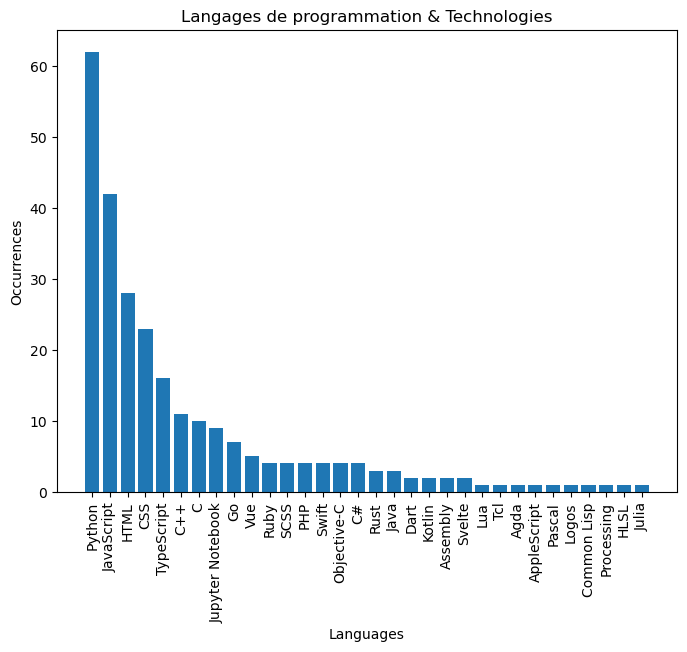

In [74]:
from collections import Counter
import matplotlib.pyplot as plt

# occurrences = Counter(langages)

# Extract the languages and their respective counts
languages = sorted_occurrences.keys()
counts = sorted_occurrences.values()

# Plot the occurrences as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(languages, counts)
plt.title('Langages de programmation & Technologies')
plt.xlabel('Languages')
plt.ylabel('Occurrences')
plt.xticks(rotation='vertical')
plt.show()


In [76]:
# from collections import Counter
# import matplotlib.pyplot as plt

# # occurrences = Counter(langages)

# # Extract the languages and their respective counts
# tech = sorted_technologies.keys()
# counts = sorted_technologies.values()

# # Plot the occurrences as a bar plot
# plt.figure(figsize=(8, 6))
# plt.bar(tech, counts)
# plt.title('Langages de programmation & Technologies')
# plt.xlabel('Languages')
# plt.ylabel('Occurrences')
# plt.xticks(rotation='vertical')
# plt.show()

# Les sujets les plus traités